In [5]:
import pandas as pd 

data = pd.read_csv("marketing_data.csv")

data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [7]:
data.dtypes

data[["Dt_Customer", "Income"]].head()

data[["Dt_Customer", "Income"]].isnull().sum()

KeyError: "['Income'] not in index"

In [9]:
print(data.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')


In [11]:
data.columns = data.columns.str.strip()

In [13]:
print(data.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')


In [15]:
data[["Income"]].head()

,Income
0,"$84,835.00"
1,"$57,091.00"
2,"$67,267.00"
3,"$32,474.00"
4,"$21,474.00"


In [45]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], errors="coerce")

data["Dt_Customer"].head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_17424\1879121574.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], errors="coerce")


0   2014-06-16
1   2014-06-15
2   2014-05-13
3   2014-05-11
4   2014-04-08
Name: Dt_Customer, dtype: datetime64[ns]

In [47]:
data["Income"].describe()

count           2216
unique          1974
top       $7,500.00 
freq              12
Name: Income, dtype: object

In [61]:
#convert income to numeric
data["Income"] = pd.to_numeric(data["Income"], errors="coerce")

print(data["Income"].isnull().sum())

2240


In [49]:
#inspect the education and marital status
print(data["Education"].unique())
print(data["Marital_Status"].unique())

['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']
['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']


In [51]:
#clean up 
data["Education"] = data["Education"].str.strip().str.title()
data["Marital_Status"] = data["Marital_Status"].str.strip().str.title()

print(data["Education"].unique())
print(data["Marital_Status"].unique())

['Graduation' 'Phd' '2N Cycle' 'Master' 'Basic']
['Divorced' 'Single' 'Married' 'Together' 'Widow' 'Yolo' 'Alone' 'Absurd']


In [63]:
#impute missing values for income
income_imputation = data.groupby(["Education", "Marital_Status"])["Income"].transform("mean")

data["Income"] = data["Income"].fillna(income_imputation)

print(data["Income"].isnull().sum())

2240


In [67]:
#total nmver of children
data["total_children"] = data["Kidhome"] + data["Teenhome"]

In [69]:
#Calculate age 
current_year = pd.to_datetime("today").year
data["age"] = current_year - data ["Year_Birth"]

In [71]:
#Total spending
spending_columns = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

data["total_spending"] = data[spending_columns].sum(axis=1)

In [73]:
print(data[["total_children", "age", "total_spending"]].head())

   total_children  age  total_spending
0               0   55            1190
1               0   64             577
2               1   67             251
3               2   58              11
4               1   36              91


In [79]:
#list of columns representing the number of purchases 
purchase_columns = ["NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]

data["total_purchases"] = data[purchase_columns].sum(axis=1)

print(data[["total_purchases"]].head())

   total_purchases
0               15
1               18
2               11
3                4
4                8


In [87]:
print(data[variables_to_plot].dtypes)
print(data[variables_to_plot].isnull().sum())

Income             float64
age                  int64
total_children     float64
total_spending     float64
total_purchases    float64
dtype: object
Income             2240
age                   0
total_children        0
total_spending        0
total_purchases       0
dtype: int64


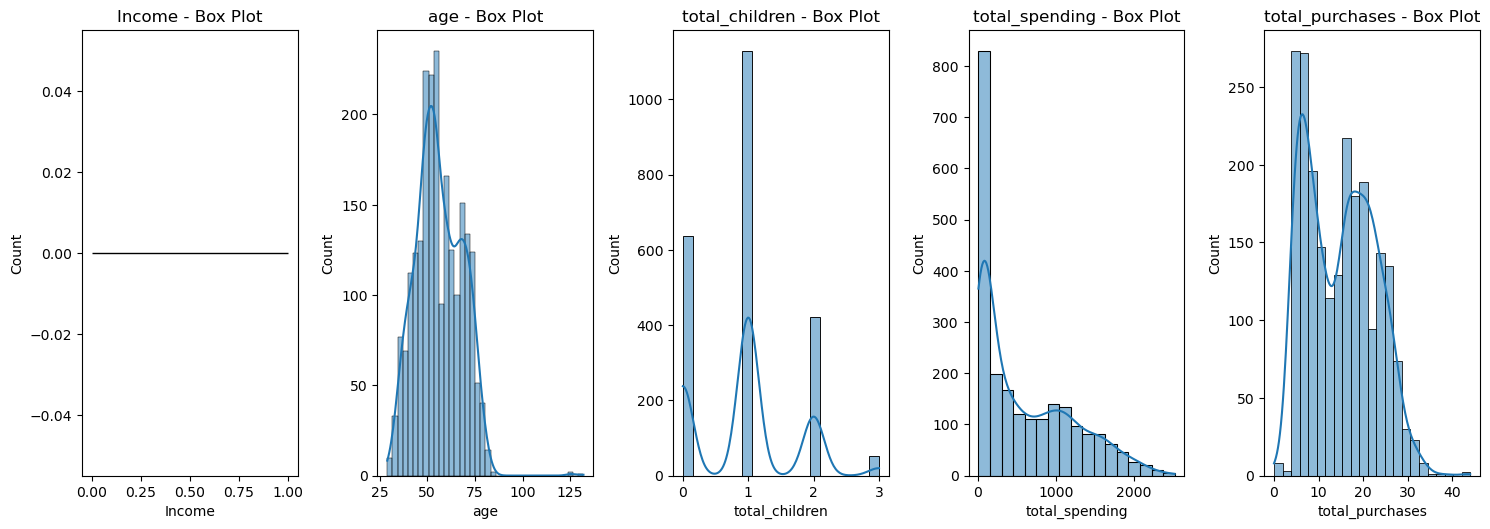

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#list of variables to analyze 
variables_to_plot = ["Income", "age", "total_children", "total_spending", "total_purchases"]

#create histograms
plt.figure(figsize=(15, 10))

for i, var in enumerate(variables_to_plot, 1):
    plt.subplot(2, len(variables_to_plot), i)
    sns.histplot(data[var], kde=True)
    plt.title(f'{var} - Box Plot')

plt.tight_layout()
plt.show()

ValueError: List of boxplot statistics and `positions` values must have same the length

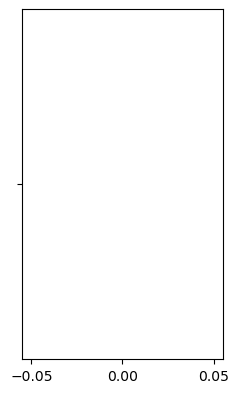

In [89]:
#ontlier detection and treatment
def treat_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    #define the lower and upper
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

#outlier
for var in variables_to_plot:
    data = treat_outliers(data, var)

plt.figure(figsize=(15, 10))

for i, var in enumerate(variables_to_plot, 1):
    plt.subplot(2, len(variables_to_plot), len(variables_to_plot) + i)
    sns.boxplot(x=data[var])
    plt.title(f'{var} - Box Plot After Treatment')

plt.tight_layout()
plt.show()

In [95]:
from sklearn.preprocessing import LabelEncoder

#education
education_order = {"Primary" :1, "Secondary": 2, "Tertiary": 3}
data["Education"] = data["Education"].map(education_order)

#marital status
marital_order = {"Single": 1, "Married": 2, "Divorecd": 3}
data["Marital_Status"] = data["Marital_Status"].map(marital_order)

print(data[["Education", "Marital_Status"]].head())

   Education  Marital_Status
0        NaN             NaN
1        NaN             1.0
2        NaN             2.0
3        NaN             NaN
4        NaN             1.0


In [103]:
data.columns = data.columns.str.strip()
print(data.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'total_children',
       'age', 'total_spending', 'total_purchases'],
      dtype='object')


In [105]:
categorical_columns = ["Country", "AccptedCmp1", "AccptedCmp2", "AccptedCmp3", "AccptedCmp4", "AccptedCmp5"]

data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

print(data_encoded.head())

KeyError: "['AccptedCmp1', 'AccptedCmp2', 'AccptedCmp3', 'AccptedCmp4', 'AccptedCmp5'] not in index"

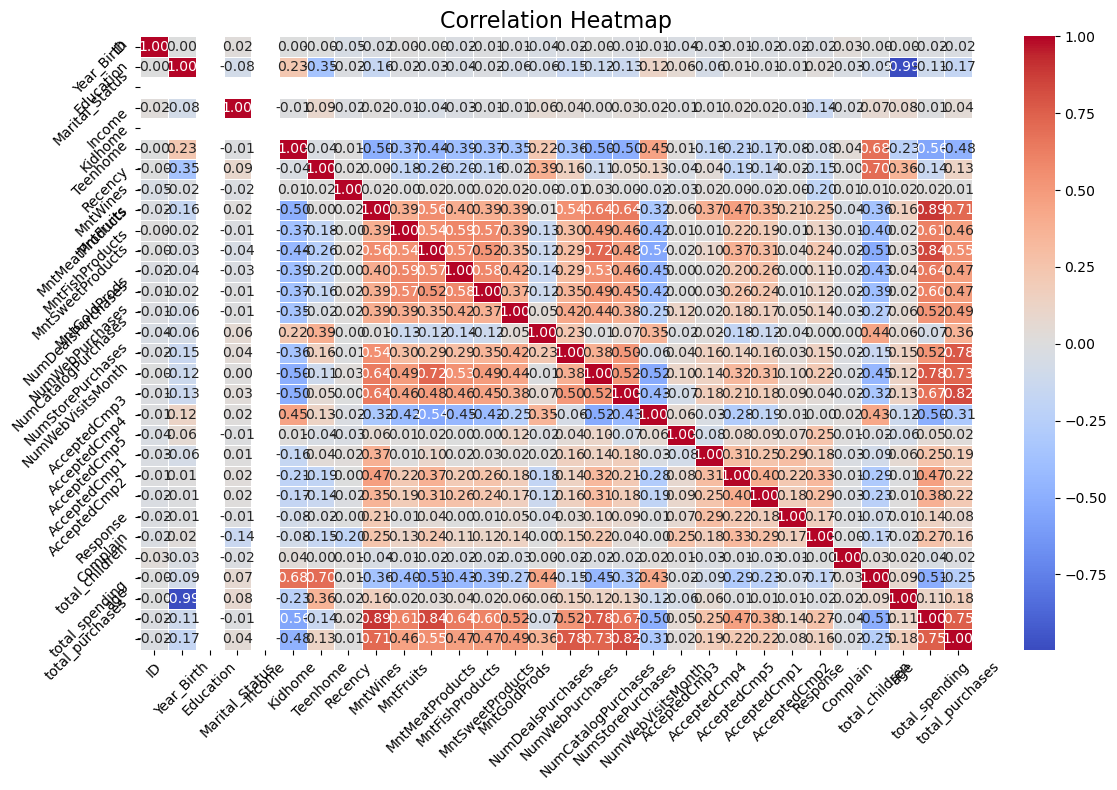

In [113]:
#heatmap ploting
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()


plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f", cbar=True)

plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.tight_layout()
plt.show()

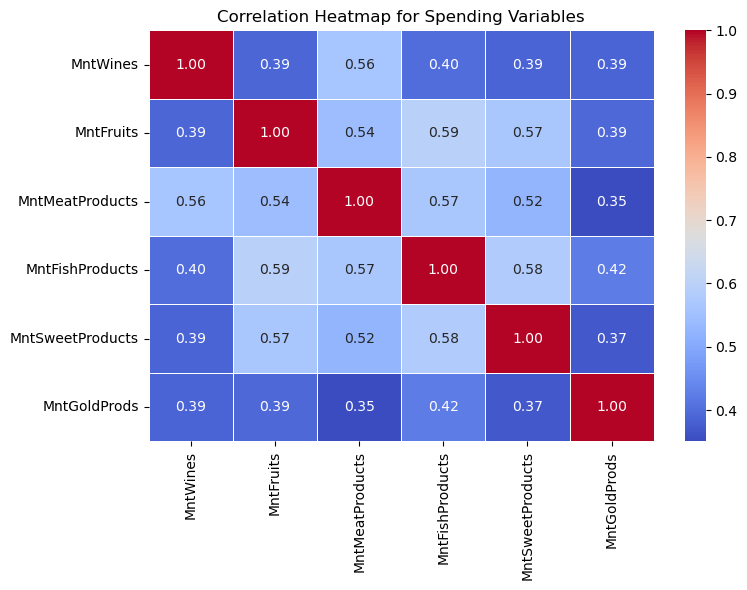

In [115]:
subset_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
correlation_subset = data[subset_columns].corr()

# Plot the heatmap for the subset
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_subset, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', cbar=True)
plt.title("Correlation Heatmap for Spending Variables")
plt.tight_layout()
plt.show()

In [117]:
#Older individuals may not possess the same level of technologicalproficiency and may, therefore, lean toward traditional in-store shoppingpreferences.
data["AgeGroup"] = np.where(data["age"] > 60, "Older", "Younger")

from scipy.stats import ttest_ind

older = data[data["AgeGroup"] == "Older"]["NumStorePurchases"]
younger = data[data["AgeGroup"] == "Younger"]["NumStorePurchases"]

t_stat, p_value = ttest_ind(older, younger)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 6.457349688037625, P-value: 1.3027093704636916e-10


In [121]:
#Customers with children likely experience time constraints, making onlineshopping a more convenient option
data["HasChildern"] = np.where(data["Kidhome"] > 0, "WithChildren", "NoChildren")

with_children = data[data["HasChildern"] == "WithChildren"]["NumWebPurchases"]
no_children = data[data["HasChildern"] == "NoChildren"]["NumWebPurchases"]

t_stat, p_value = ttest_ind(with_children, no_children)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -19.06984762853535, P-value: 3.0290228921834255e-75


In [127]:
#Sales at physical stores may face the risk of cannibalization by alternative distribution channels.
correlation= data[["NumStorePurchases", "NumWebPurchases"]].corr()
print(correlation)

                   NumStorePurchases  NumWebPurchases
NumStorePurchases           1.000000         0.502713
NumWebPurchases             0.502713         1.000000


In [129]:
#Does the United States significantly outperform the rest of the world in total purchase volumes?
data['IsUS'] = np.where(data['Country'] == 'United States', 'US', 'Other')

data['TotalPurchases'] = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

us_customers = data[data['IsUS'] == 'US']['TotalPurchases']
other_customers = data[data['IsUS'] == 'Other']['TotalPurchases']

t_stat, p_value = ttest_ind(us_customers, other_customers)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: nan, P-value: nan


In [23]:
import pandas as pd 

df = pd.read_csv("marketing_data.csv")
print(df.head())

      ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0         0     6/16/14        0       189  ...                  6   
1         0     6/15/14        0       464  ...                  7   
2         1     5/13/14        0       134  ...                  5   
3         1     5/11/14        0        10  ...                  2   
4         0      4/8/14        0         6  ...                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  1             0             0            

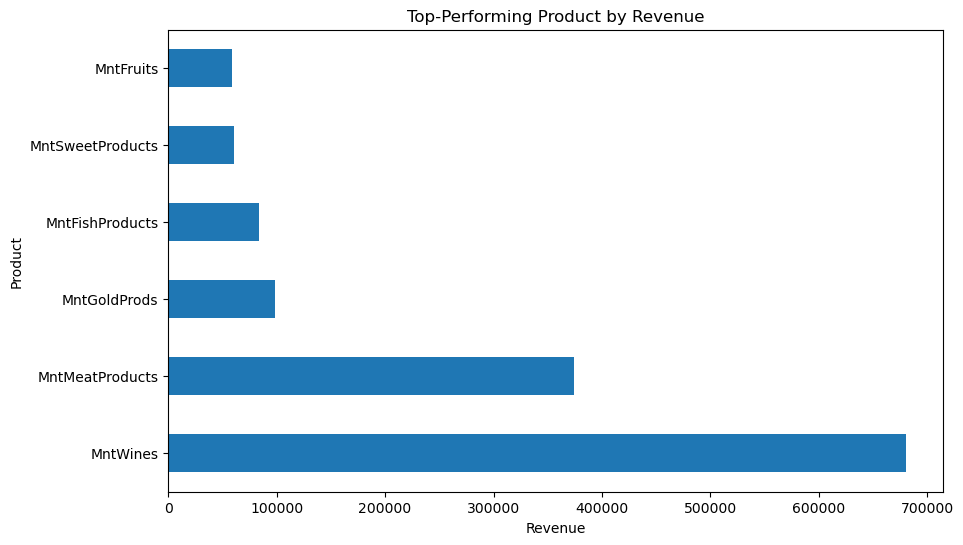

In [31]:
#Identify the top-performing products and those with the lowest revenue
import pandas as pd 
import matplotlib.pyplot as plt

product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df["TotalProductExpenditure"] = df [product_columns].sum(axis=1)

#aggreagte total revenue for each product
product_revenue = df[product_columns].sum()

#sort
top_performing_products = product_revenue.sort_values(ascending=False)

#plot
top_performing_products.plot(kind="barh", figsize=(10, 6))
plt.title("Top-Performing Product by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.show()

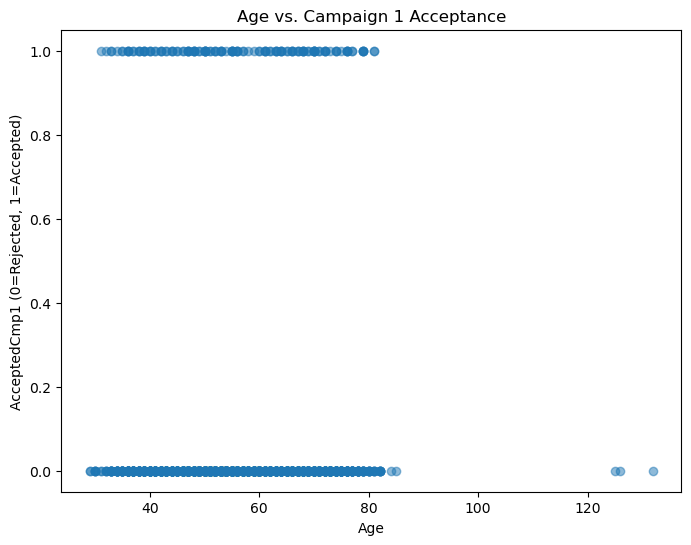

Correlation between Age and Campaign 1 Acceptance: 0.00593031674773247


In [27]:
#age and the acceptenace rate of the last campaign
df["Age"] = 2025 - df["Year_Birth"]

correlation = df["Age"].corr(df["AcceptedCmp1"])

#plot
plt.figure(figsize=(8,6))
plt.scatter(df["Age"], df["AcceptedCmp1"], alpha=0.5)
plt.title("Age vs. Campaign 1 Acceptance")
plt.xlabel("Age")
plt.ylabel("AcceptedCmp1 (0=Rejected, 1=Accepted)")
plt.show()

print(f"Correlation between Age and Campaign 1 Acceptance: {correlation}")

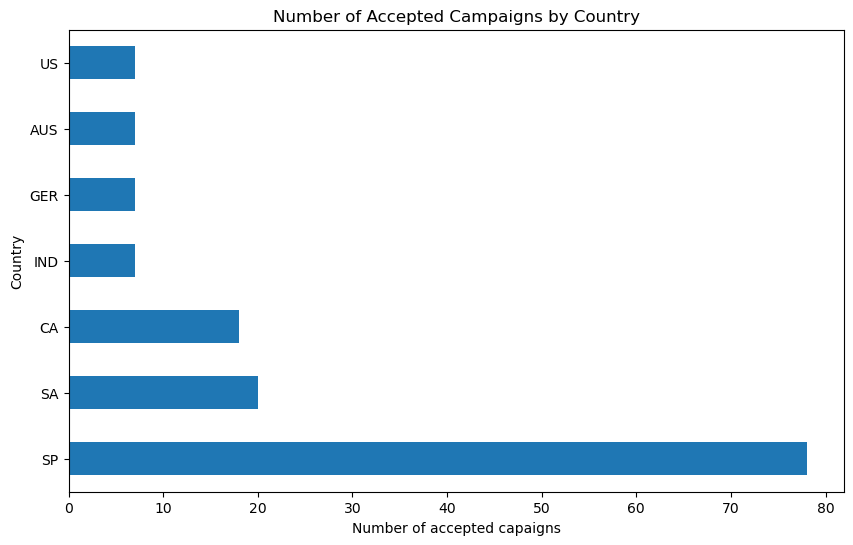

In [37]:
#determine the country with the highest number of customers who accepted the last campaign
accpeted_customers =  df[df["AcceptedCmp1"] == 1]

#count number 
country_acceptance = accpeted_customers["Country"].value_counts()

#plot
country_acceptance.plot(kind="barh", figsize=(10, 6))
plt.title("Number of Accepted Campaigns by Country")
plt.xlabel("Number of accepted capaigns")
plt.ylabel("Country")
plt.show()

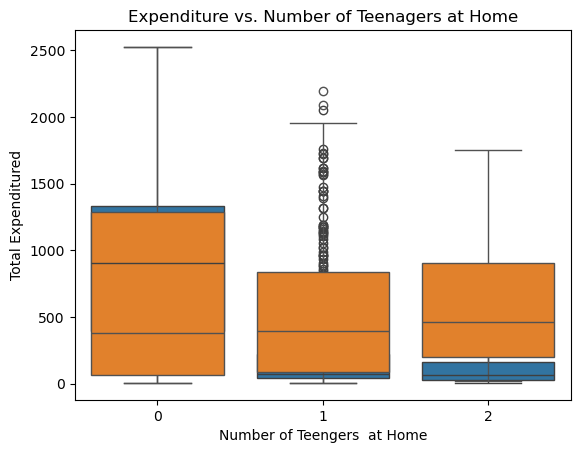

In [43]:
#investigate if there is a discernible pattern in the number
import seaborn as sns

df["TotalExpenditure"] = df[product_columns].sum(axis=1)

#explore pattern with the number
sns.boxplot(x="Kidhome", y="TotalExpenditure", data=df)
plt.title("Expenditured vs. Number Of Children at Home")
plt.xlabel("Number of Children at Home")
plt.ylabel("Total Expenditured")
plt.show

sns.boxplot(x="Teenhome", y= "TotalExpenditure", data=df)
plt.title("Expenditure vs. Number of Teenagers at Home")
plt.xlabel("Number of Teengers  at Home")
plt.ylabel("Total Expenditured")
plt.show()

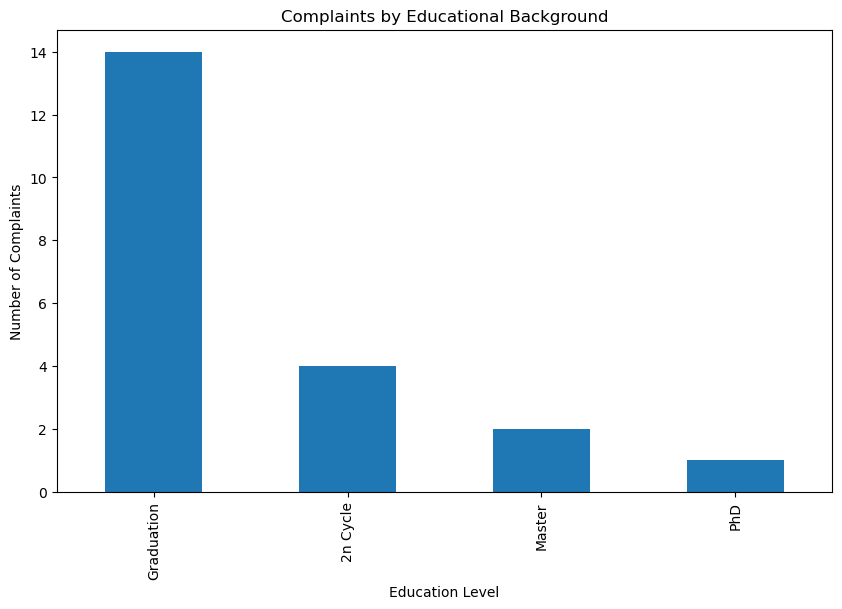

In [45]:
#analyze the educational background of customers who lodged complaints in the last two years

complaints_data = df[df["Complain"] == 1]

#group by education and count the number of complaints 
education_complaints = complaints_data["Education"].value_counts()

#plot
education_complaints.plot(kind="bar", figsize=(10, 6))
plt.title("Complaints by Educational Background")
plt.xlabel("Education Level")
plt.ylabel("Number of Complaints")
plt.show()